In [12]:
import pandas as pd

# Load the datasets to inspect them
telecom_df = pd.read_csv('../data/orange_telecom.csv')
ecommerce_df = pd.read_csv('../data/E Commerce Dataset.csv')

df=pd.read_csv('../data/Bank_churn.csv')

# Display the first few rows of each dataset to understand their structure
telecom_df.head(), ecommerce_df.head(), bank_df.head()


(  state  account length  area code international plan voice mail plan  \
 0    LA             117        408                 No              No   
 1    IN              65        415                 No              No   
 2    NY             161        415                 No              No   
 3    SC             111        415                 No              No   
 4    HI              49        510                 No              No   
 
    number vmail messages  total day minutes  total day calls  \
 0                      0              184.5               97   
 1                      0              129.1              137   
 2                      0              332.9               67   
 3                      0              110.4              103   
 4                      0              119.3              117   
 
    total day charge  total eve minutes  total eve calls  total eve charge  \
 0             31.37              351.6               80             29.89   
 1    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  int64  
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  int64  
 5   gender           10000 non-null  int64  
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [15]:
df.describe()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df, target='churn'):
    """
    Generic data preprocessing function that:
    - Handles missing values
    - Encodes categorical variables
    - Scales numerical features
    """
    # Handle missing values (fill with mean for numerical and mode for categorical)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    
    # Encode categorical variables
    label_encoders = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
    
    # Split features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y, label_encoders, scaler


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def perform_eda(df, target='churn'):
    """
    Performing quick exploratory data analysis:
    - Visualize missing values
    - Display feature correlations with the target
    - Visualize distributions of key features
    """
    
    # Display correlation matrix
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation with {target}")
    plt.show()

    # Visualize target distribution
    sns.countplot(x=target, data=df)
    plt.title(f"Distribution of {target}")
    plt.show()
    
   
  

In [13]:
preprocess_data(df, target='churn')

/tmp/ipykernel_24632/1786369590.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_24632/1786369590.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

(array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
          0.97024255,  0.02188649],
        [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
          0.97024255,  0.21653375],
        [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
         -1.03067011,  0.2406869 ],
        ...,
        [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
          0.97024255, -1.00864308],
        [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
         -1.03067011, -0.12523071],
        [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
         -1.03067011, -1.07636976]]),
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 9995    0
 9996    0
 9997    1
 9998    1
 9999    0
 Name: churn, Length: 10000, dtype: int64,
 {'surname': LabelEncoder(),
  'geography': LabelEncoder(),
  'gender': LabelEncoder()},
 StandardScaler())

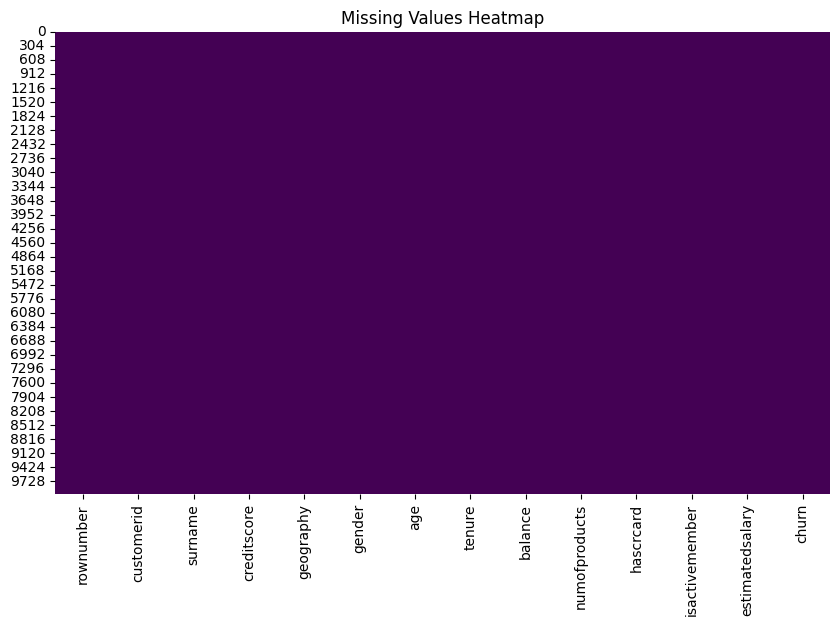

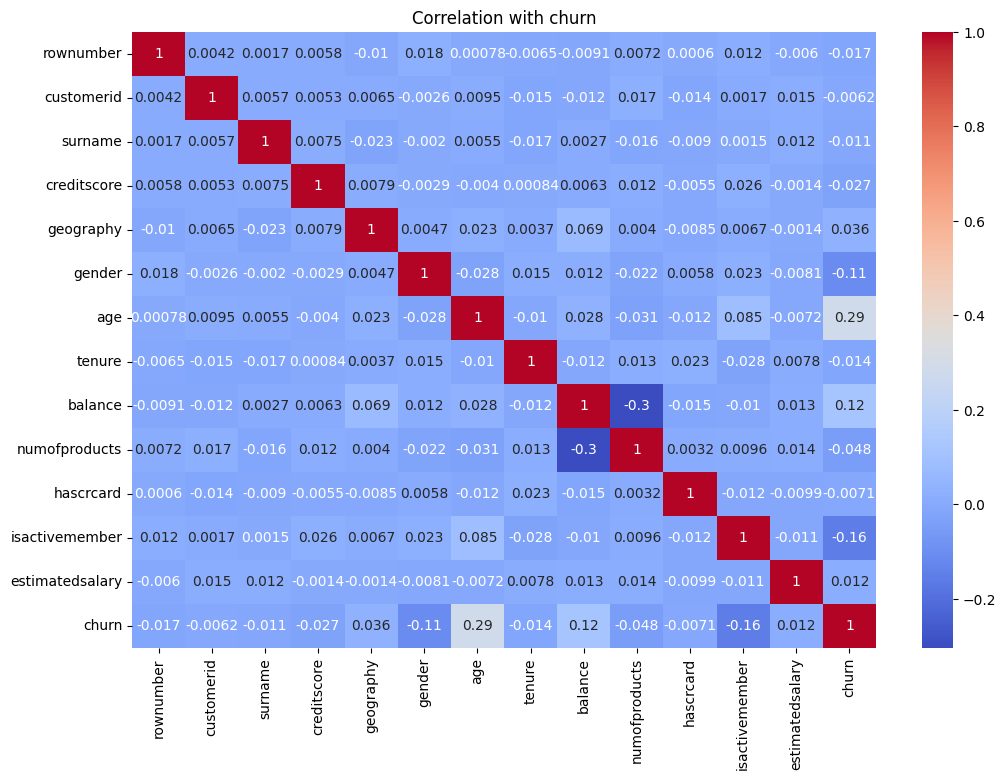

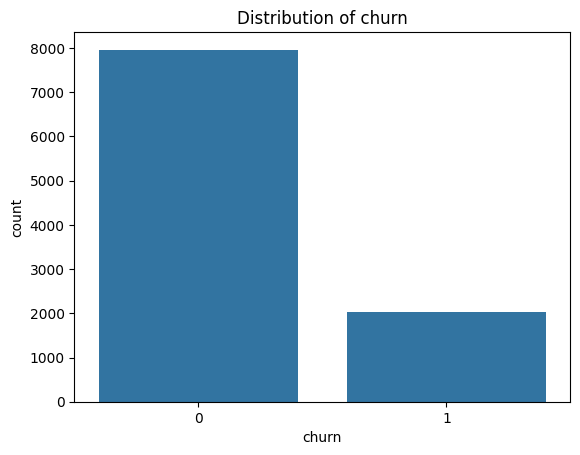

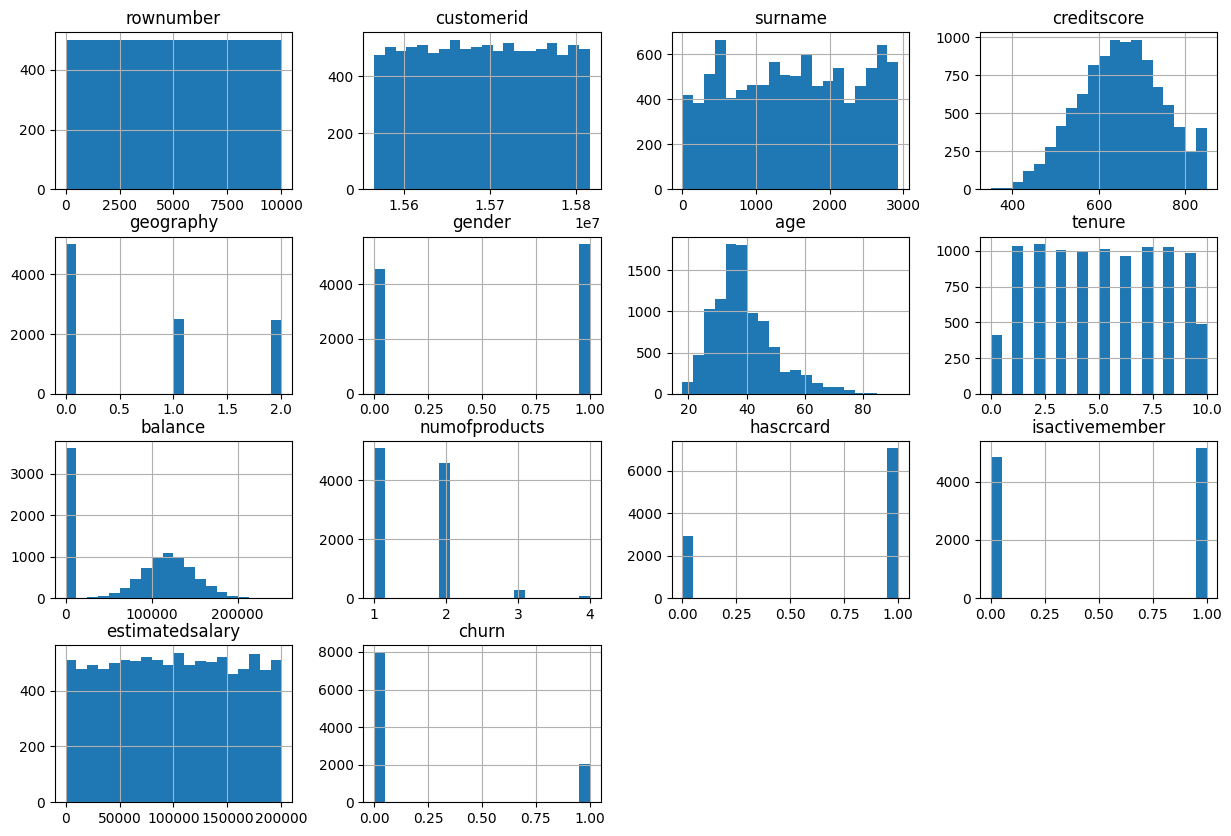

In [16]:
perform_eda(df, target='churn')